<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [4]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer: Use "file name".shape
movies.shape

(979, 6)

#### Check the data type of each column.

In [6]:
# Answer: Use "file name".dtypes
print(movies.dtypes)

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object


#### Calculate the average movie duration.

In [7]:
# Answer: use "file name"["column name"].mean()
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [15]:
# Answer: Use "file name".sort_values('column name') OR "file name".sort_values(['column name 1', 'column name 2'])    
movies.sort_values('duration')

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

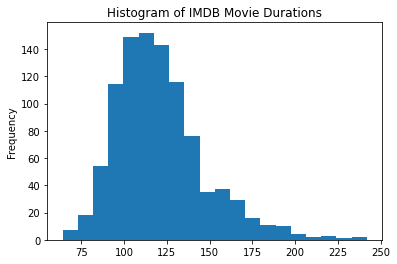

In [20]:
# Answer: Use "file name"."column name".plot(kind='hist', bins=20(number of columns) , title='Histogram of IMDB Movie Durations'));
movies.duration.plot(kind='hist', bins=20, title='Histogram of IMDB Movie Durations');

#### Use a box plot to display that same data.

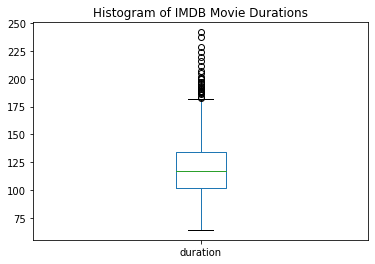

In [21]:
# Answer: Use "file name"."column name".plot(kind='box') 
movies.duration.plot(kind='box', title='Histogram of IMDB Movie Durations');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [22]:
# Answer: "file name".['column name'].value_counts 
movies['content_rating'].value_counts()


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

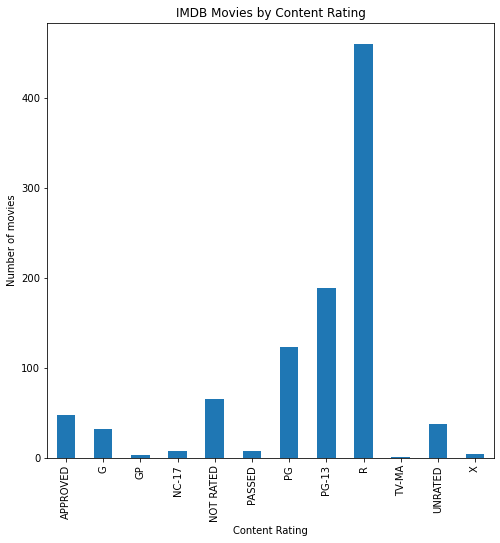

In [26]:
# Answer:
movies.content_rating.value_counts().sort_index().plot(kind='bar', figsize=(8,8));     
plt.xlabel('Content Rating');
plt.ylabel('Number of movies');
plt.title('IMDB Movies by Content Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [30]:
# Answer:
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
#Verify with "file name".['column name that changed valuesd'].value_counts 
movies['content_rating'].replace({"NOT RATED":"UNRATED", "APPROVED":"UNRATED", "PASSED":"UNRATED", "GP":"UNRATED"}, inplace=True)
movies['content_rating'].value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [31]:
# Answer:
#df["column1"].replace({"a": "x", "b": "y"}, inplace=True)
#Verify with "file name".['column name that changed valuesd'].value_counts 
movies['content_rating'].replace({"X":"NC-17", "TV-MA":"NC-17"}, inplace=True)
movies['content_rating'].value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [32]:
# Answer:
#use dataframe.isnull().sum
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [39]:
# Answer:
# Note content_rating is missing 3 values/has 3 null values
# creating bool series True for NaN values  
# bool_series = pd.isnull(df["Gender"])  
# show data only with Content Rating = NaN
# Having seen these movies (these movies were released when the MPA rating system started in 1969 and
# was voluntary) the content rating of these movies would be PG-13 due to violence and language.
bool_series = pd.isnull(movies["content_rating"]) 
movies[bool_series]


,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [169]:
# Alter NaN in "content_rating" to PG-13
movies['content_rating'].replace({"NaN":"PG-13"}, inplace=True)
#Verify there are no null values
movies['content_rating'].value_counts()
# NOTE: The movie content ratings can be altered one by one with df.ix['Row location','Column location']
# ,  df.ix['x','C']

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [49]:
# Answer:
#df[df['Category A'] greater than or equal to 120 minutes]['Category 2'].mean()
movies[(movies['duration'] >= 120)]['star_rating'].mean()

7.948898678414082

In [51]:
#df[df['Category A'] less than or equal to 120 minutes]['Category 2'].mean()
movies[(movies['duration'] <= 120)]['star_rating'].mean()

7.8384898710865345

In [ ]:
# There is a difference of 0.11 stars

#### Use a visualization to detect whether there is a relationship between duration and star rating.

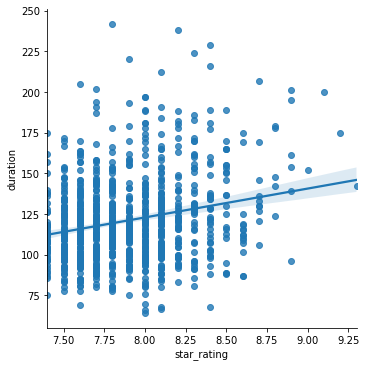

In [52]:
# Answer:
import seaborn as sns
sns.lmplot(x='star_rating', y='duration', data=movies)
#There is a weak positive correlation between movie duration and star rating

#### Calculate the average duration for each genre.

In [53]:
# Answer:
#Find the list of genres
movies.genre.value_counts()

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64

In [56]:
#Use df[df['genre'] == category name]['duration'].mean()
#Drama
movies[movies['genre'] == 'Drama']['duration'].mean()
#126.5 mins

126.53956834532374

In [57]:
#Comedy
movies[movies['genre'] == 'Comedy']['duration'].mean()
#107.6 mins

107.6025641025641

In [58]:
#Action
movies[movies['genre'] == 'Action']['duration'].mean()
#126.5 mins

126.48529411764706

In [59]:
#Crime
movies[movies['genre'] == 'Crime']['duration'].mean()
#122.3 mins

122.29838709677419

In [60]:
#Biography
movies[movies['genre'] == 'Biography']['duration'].mean()
#131.8 mins

131.84415584415584

In [61]:
#Adventure
movies[movies['genre'] == 'Adventure']['duration'].mean()
#134.8 mins

134.84

In [62]:
#Animation
movies[movies['genre'] == 'Animation']['duration'].mean()
#96.6 mins

96.59677419354838

In [63]:
#Horror
movies[movies['genre'] == 'Horror']['duration'].mean()
#102.5 mins

102.51724137931035

In [64]:
#Mystery
movies[movies['genre'] == 'Mystery']['duration'].mean()
#115.6 mins

115.625

In [65]:
#Western
movies[movies['genre'] == 'Western']['duration'].mean()
#136.7

136.66666666666666

In [67]:
#Sci-Fi 
movies[movies['genre'] == 'Sci-Fi']['duration'].mean()
#109 mins

109.0

In [68]:
#Thriller
movies[movies['genre'] == 'Thriller']['duration'].mean()
#114.2 mins

114.2

In [70]:
#Film-Noir      
movies[movies['genre'] == 'Film-Noir']['duration'].mean()
# 97.3 mins

97.33333333333333

In [71]:
#Family
movies[movies['genre'] == 'Family']['duration'].mean()
#107.5 mins

107.5

In [72]:
#Fantasy
movies[movies['genre'] == 'Fantasy']['duration'].mean()
#112 mins

112.0

In [73]:
#History
movies[movies['genre'] == 'History']['duration'].mean()
#66 mins

66.0

## Advanced level

#### Visualize the relationship between content rating and duration.

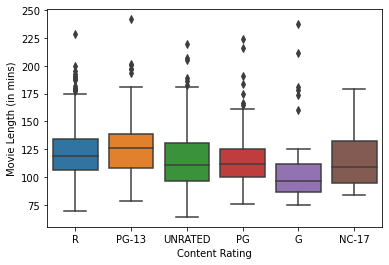

<Figure size 1728x1728 with 0 Axes>

In [121]:
# Answer:
import seaborn as sns
sns.boxplot(x='content_rating', y='duration', data=movies)
plt.xlabel('Content Rating');
plt.ylabel('Movie Length (in mins)');
plt.figure(figsize=(24, 24));


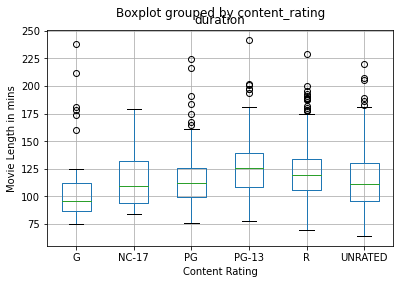

In [140]:
#Or use matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

movies.boxplot(column='duration', by='content_rating')
plt.xlabel('Content Rating');
plt.ylabel('Movie Length in mins');
fig, axes = plt.figsize=(16,8)

#### Determine the top rated movie (by star rating) for each genre.

In [143]:
#Use groupby function to splitting 'genre' into subcategories (i.e. Crime, Comedy). Use sort=False and max to get 
# the highest values in star ratings that should be matched with subcategories. 
movies.groupby(['genre'], sort=False)['star_rating'].max()


genre
Crime        9.3
Action       9.0
Drama        8.9
Western      8.9
Adventure    8.9
Biography    8.9
Comedy       8.6
Animation    8.6
Mystery      8.6
Horror       8.6
Film-Noir    8.3
Sci-Fi       8.2
History      8.0
Thriller     8.0
Family       7.9
Fantasy      7.7
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [172]:
# Answer:Use the detect and list duplicates function. Note however, the first half of duplicates is
# missing and so all duplicate values listed needs "keep=False"   
movies[movies.duplicated('title', keep=False)]

#Can also use Concatenate and groupby and use len(title) 
#pd.concat(title for _, title in movies.groupby("title") if len(title) > 1)

#The duplicates in title are either the original movie or the remake of that movie that made earlier.


,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [191]:
# Answer:
#Find the list of genres, put genres with at least 10 movies into major_genres and then groupby
# the average "star rating"
movies.genre.value_counts()
major_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(major_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [192]:
# Answer: Use major_genres as an index of genre_counts and use groupby and average  "star_rating" 
genre_counts = movies.genre.value_counts()
major_genres = genre_counts[genre_counts >= 10].index
movies[movies.genre.isin(major_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [193]:
# Answer: Use >=10 to filter out genres with more than 10 movies with their average ratings
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [195]:
# Answer:
#Create aggregate "ratings_by_genre" which aggregates movies by genre and average rating and later is
# separated by the "">=10" filter
ratings_by_genre = movies.groupby('genre').star_rating.agg(['count', 'mean'])
ratings_by_genre[ratings_by_genre['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [221]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [231]:
#taking out u' , u' , and '
movies.actors_list.replace(['\[', 'u\'','\'\]'],'', regex=True, inplace=True)
movies.actors_list.head()

0          Tim Robbins', Morgan Freeman', Bob Gunton
1             Marlon Brando', Al Pacino', James Caan
2         Al Pacino', Robert De Niro', Robert Duvall
3      Christian Bale', Heath Ledger', Aaron Eckhart
4    John Travolta', Uma Thurman', Samuel L. Jackson
Name: actors_list, dtype: object

In [232]:
#Taking out comma separator
movies.actors_list.replace('\',', ',', regex=True, inplace=True)
movies.actors_list.unique()

array(['Tim Robbins, Morgan Freeman, Bob Gunton',
       'Marlon Brando, Al Pacino, James Caan',
       'Al Pacino, Robert De Niro, Robert Duvall',
       'Christian Bale, Heath Ledger, Aaron Eckhart',
       'John Travolta, Uma Thurman, Samuel L. Jackson',
       'Henry Fonda, Lee J. Cobb, Martin Balsam',
       'Clint Eastwood, Eli Wallach, Lee Van Cleef',
       'Elijah Wood, Viggo Mortensen, Ian McKellen',
       'Liam Neeson, Ralph Fiennes, Ben Kingsley',
       'Brad Pitt, Edward Norton, Helena Bonham Carter',
       'Elijah Wood, Ian McKellen, Orlando Bloom',
       'Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen Page',
       'Mark Hamill, Harrison Ford, Carrie Fisher',
       'Tom Hanks, Robin Wright, Gary Sinise',
       'Elijah Wood, Ian McKellen, Viggo Mortensen',
       'Matthew McConaughey, Anne Hathaway, Jessica Chastain',
       'Jack Nicholson, Louise Fletcher, Michael Berryman',
       'Toshir\\xf4 Mifune, Takashi Shimura, Keiko Tsushima',
       'Robert De Niro, Ray 

In [233]:
#Split the actors_list column into three columns each with one actor
actors=pd.DataFrame(movies.actors_list.str.split(',').tolist(), columns = ['actor_1','actor_2','actor_3'])
#actors.head()
movies=pd.concat([movies, actors], axis=1)
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list,actor_1,actor_2,actor_3
0,9.3,The Shawshank Redemption,R,Crime,142,"Tim Robbins, Morgan Freeman, Bob Gunton",Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,"Marlon Brando, Al Pacino, James Caan",Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,"Al Pacino, Robert De Niro, Robert Duvall",Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,"Christian Bale, Heath Ledger, Aaron Eckhart",Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,"John Travolta, Uma Thurman, Samuel L. Jackson",John Travolta,Uma Thurman,Samuel L. Jackson


In [255]:

movies[['actor_1', 'actor_2', 'actor_3']].apply(pd.Series.value_counts)

,actor_1,actor_2,actor_3
Aamir Khan,NaN,1.0,NaN
Aaron Eckhart,NaN,NaN,1.0
Abbie Cornish,NaN,NaN,1.0
Abigail Breslin,NaN,1.0,NaN
Ad\xe8le Exarchopoulos,NaN,1.0,NaN
...,...,...,...
Zooey Deschanel,1.0,NaN,NaN
"u""Brian O'Halloran""",2.0,NaN,NaN
"u""Paige O'Hara""",1.0,NaN,NaN
"u""Peter O'Toole""",1.0,NaN,NaN


In [249]:
movies.groupby(['actor_1', 'actor_2', 'actor_3'], sort=False)['star_rating'].mean()

actor_1          actor_2               actor_3           
Tim Robbins       Morgan Freeman        Bob Gunton           9.3
Marlon Brando     Al Pacino             James Caan           9.2
Al Pacino         Robert De Niro        Robert Duvall        9.1
Christian Bale    Heath Ledger          Aaron Eckhart        9.0
John Travolta     Uma Thurman           Samuel L. Jackson    8.9
                                                            ... 
Dustin Hoffman    Jessica Lange         Teri Garr            7.4
Michael J. Fox    Christopher Lloyd     Mary Steenburgen     7.4
Russell Crowe     Paul Bettany          Billy Boyd           7.4
JoBeth Williams   u"Heather O'Rourke"   Craig T. Nelson      7.4
Charlie Sheen     Michael Douglas       Tamara Tunie         7.4
Name: star_rating, Length: 969, dtype: float64

In [256]:
movies.groupby(['actor_1', 'actor_2', 'actor_3']).max() 
#It turns out Aamir Khan's movies have highest "average_stars" in the IMDB database.


star_rating  \
actor_1             actor_2          actor_3                            
Aamir Khan           Gracy Singh      Rachel Shelley              8.3   
                     Madhavan         Mona Singh                  8.5   
                     Saif Ali Khan    Akshaye Khanna              8.3   
                     Soha Ali Khan    Siddharth                   8.4   
Aaron Eckhart        Cameron Bright   Maria Bello                 7.6   
...                                                               ...   
u"Brian O'Halloran"  Jeff Anderson    Marilyn Ghigliotti          7.9   
                                      Rosario Dawson              7.5   
u"Paige O'Hara"      Robby Benson     Richard White               8.1   
u"Peter O'Toole"     Alec Guinness    Anthony Quinn               8.4   
u"Ryan O'Neal"       Marisa Berenson  Patrick Magee               8.1   

                                                                                      title  \
actor_1             actor_2          actor_3                                                  
Aamir Khan           Gracy Singh      Rachel Shelley      Lagaan: Once Upon a Time in India   
                     Madhavan         Mona Singh                                   3 Idiots   
                     Saif Ali Khan    Akshaye Khanna                         Dil Chahta Hai   
                     Soha Ali Khan    Siddharth                             Rang De Basanti   
Aaron Eckhart        Cameron Bright   Maria Bello                     Thank You for Smoking   
...                                                                                     ...   
u"Brian O'Halloran"  Jeff Anderson    Marilyn Ghigliotti                             Clerks   
                                      Rosario Dawson                              Clerks II   
u"Paige O'Hara"      Robby Benson     Richard White                    Beauty and the Beast   
u"Peter O'Toole"     Alec Guinness    Anthony Quinn                      Lawrence of Arabia   
u"Ryan O'Neal"       Marisa Berenson  Patrick Magee                            Barry Lyndon   

                                                         content_rating  \
actor_1             actor_2          actor_3                              
Aamir Khan           Gracy Singh      Rachel Shelley                 PG   
                     Madhavan         Mona Singh                  PG-13   
                     Saif Ali Khan    Akshaye Khanna          NOT RATED   
                     Soha Ali Khan    Siddharth               NOT RATED   
Aaron Eckhart        Cameron Bright   Maria Bello                     R   
...                                                                 ...   
u"Brian O'Halloran"  Jeff Anderson    Marilyn Ghigliotti              R   
                                      Rosario Dawson                  R   
u"Paige O'Hara"      Robby Benson     Richard White                   G   
u"Peter O'Toole"     Alec Guinness    Anthony Quinn                  PG   
u"Ryan O'Neal"       Marisa Berenson  Patrick Magee                  PG   

                                                              genre  duration  \
actor_1             actor_2          actor_3                                    
Aamir Khan           Gracy Singh      Rachel Shelley      Adventure       224   
                     Madhavan         Mona Singh             Comedy       170   
                     Saif Ali Khan    Akshaye Khanna         Comedy       183   
                     Soha Ali Khan    Siddharth               Drama       157   
Aaron Eckhart        Cameron Bright   Maria Bello            Comedy        92   
...                                                             ...       ...   
u"Brian O'Halloran"  Jeff Anderson    Marilyn Ghigliotti     Comedy        92   
                                      Rosario Dawson         Comedy        97   
u"Paige O'Hara"      Robby Benson     Richard White       Animation        84   
u"Pet